In [98]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, mean_squared_error
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor

from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
from statsmodels.tsa.api import VAR
from pandas.plotting import register_matplotlib_converters

In [99]:
values = pd.read_csv("../data/kalshi_features_v1.csv")
values.shape

(1300, 33)

In [100]:
values.head()

,Date,DayOfWeek,Open,High,Low,Close,Adj Close,Volume,OC Difference,HL Difference,...,Close_Lag_2,Close_Lag_3,Close_Lag_4,Close_Lag_5,ShortEMA,LongEMA,MACD,SignalLine,MACD_Histogram,RSI
0,2023-10-23,1,14514.110352,14746.370117,14419.059570,14604.849609,14604.849609,4669060000,-90.739257,327.310547,...,14381.639648,14109.570313,14180.419922,14335.509766,14637.994410,14839.828129,-201.833719,-165.128518,-36.705201,35.759337
1,2023-10-20,5,14752.589844,14781.219727,14552.120117,14560.879883,14560.879883,4622840000,191.709961,229.099610,...,14745.860352,14381.639648,14109.570313,14180.419922,14626.130636,14819.165296,-193.034659,-170.709746,-22.324913,35.023629
2,2023-10-19,4,14981.129883,15023.910156,14749.299805,14783.129883,14783.129883,5014790000,198.000000,274.610351,...,14604.849609,14745.860352,14381.639648,14109.570313,14650.284367,14816.496006,-166.211639,-169.810125,3.598486,38.205042
3,2023-10-18,3,15022.280273,15103.870117,14865.809570,14909.259766,14909.259766,4617140000,113.020507,238.060547,...,14560.879883,14604.849609,14745.860352,14381.639648,14690.126736,14823.367395,-133.240660,-162.496232,29.255572,41.792372
4,2023-10-17,2,15009.259766,15187.059570,14932.769531,15122.009766,15122.009766,4417640000,-112.750000,254.290039,...,14783.129883,14560.879883,14604.849609,14745.860352,14756.570279,14845.489052,-88.918774,-147.780740,58.861967,49.322010


# Time Series

#### Problem Statement
**We aim to forecast future stock market Open and Close prices based on historical data. The objectives are two-fold:**
1) Predict the Open and Close prices for the next few days based on previous price data and other related financial indicators.
2) Given only the Open price for a future date, predict the corresponding Close price.

#### Steps to Take
1. Data Preprocessing
2. EDA (If Needed)
3. Model Selection
4. Feature Selection
5. Evaluation

## Data Preprocessing

In [101]:
values_ts = values

In [102]:
values_ts['Date'] = pd.to_datetime(values['Date'])

In [103]:
values_ts.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1300 entries, 0 to 1299
Data columns (total 33 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   Date                    1300 non-null   datetime64[ns]
 1   DayOfWeek               1300 non-null   int64         
 2   Open                    1300 non-null   float64       
 3   High                    1300 non-null   float64       
 4   Low                     1300 non-null   float64       
 5   Close                   1300 non-null   float64       
 6   Adj Close               1300 non-null   float64       
 7   Volume                  1300 non-null   int64         
 8   OC Difference           1300 non-null   float64       
 9   HL Difference           1300 non-null   float64       
 10  OC %Change              1300 non-null   float64       
 11  HL %Change              1300 non-null   float64       
 12  Close_Status            1300 non-null   int64   

In [104]:
values_ts.set_index('Date',inplace=True)

In [105]:
values_ts.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1300 entries, 2023-10-23 to 2018-08-23
Data columns (total 32 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   DayOfWeek               1300 non-null   int64  
 1   Open                    1300 non-null   float64
 2   High                    1300 non-null   float64
 3   Low                     1300 non-null   float64
 4   Close                   1300 non-null   float64
 5   Adj Close               1300 non-null   float64
 6   Volume                  1300 non-null   int64  
 7   OC Difference           1300 non-null   float64
 8   HL Difference           1300 non-null   float64
 9   OC %Change              1300 non-null   float64
 10  HL %Change              1300 non-null   float64
 11  Close_Status            1300 non-null   int64  
 12  Close_Difference        1300 non-null   float64
 13  Same Bracket            1300 non-null   int64  
 14  Avg_OC_Spread_10_Day  

In [106]:
values_ts.sort_index(inplace=True)

## NEXT: WE NEED TO GET OUR DATA TO BECOME STATIONERY



## EDA


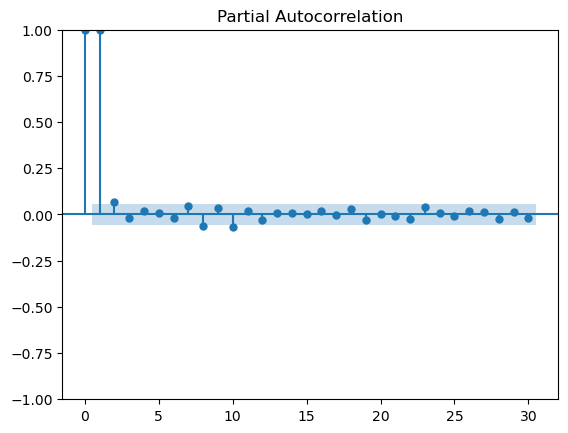

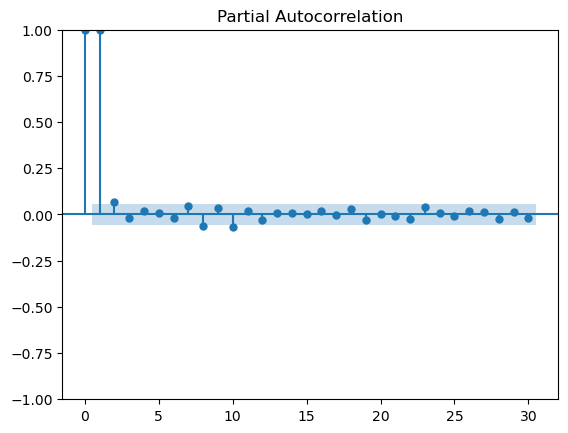

In [107]:
plot_pacf(values_ts['Close'],lags=30)

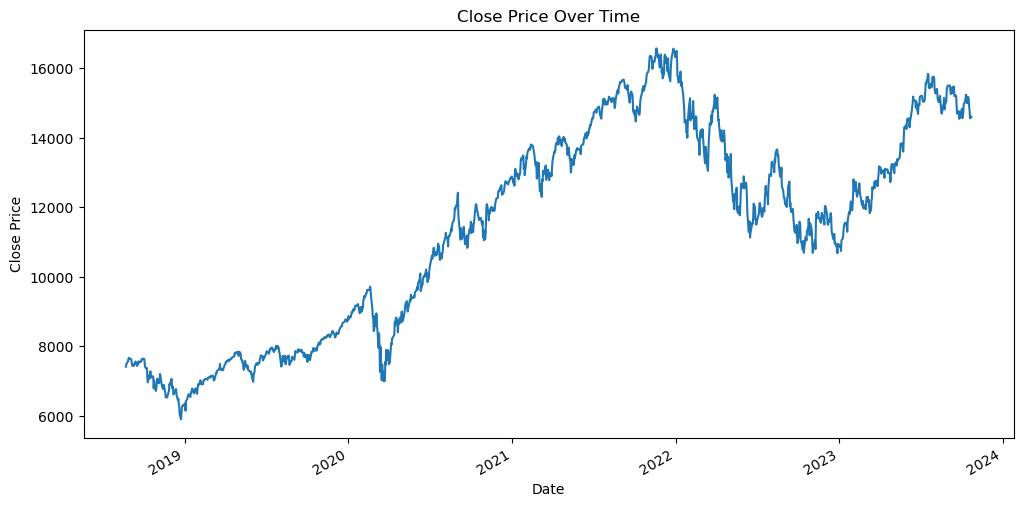

In [108]:
import matplotlib.pyplot as plt

# Plotting the 'Close' column
values_ts['Close'].plot(figsize=(12, 6))
plt.title('Close Price Over Time')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.show()


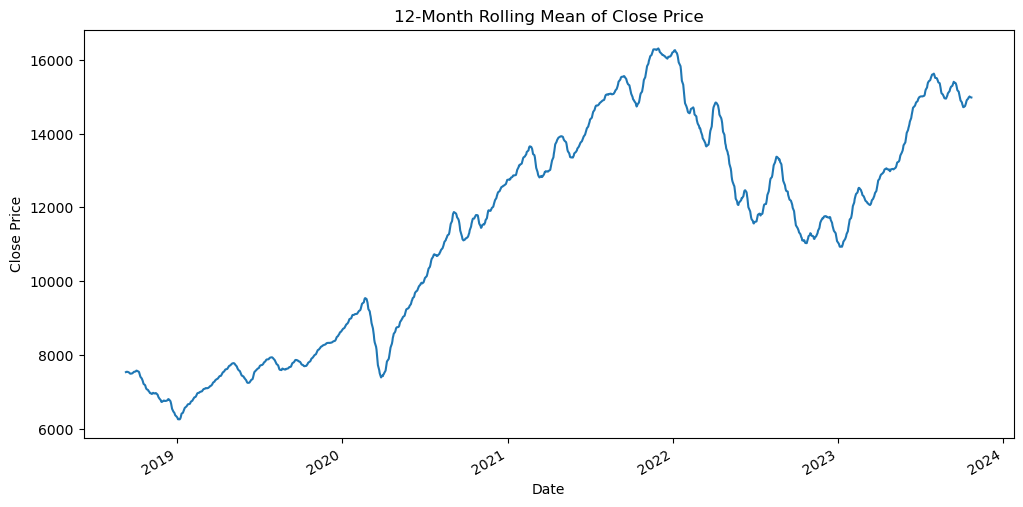

In [139]:
values_ts['Close'].rolling(window=12).mean().plot(figsize=(12, 6))
plt.title('12-Month Rolling Mean of Close Price')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.show()


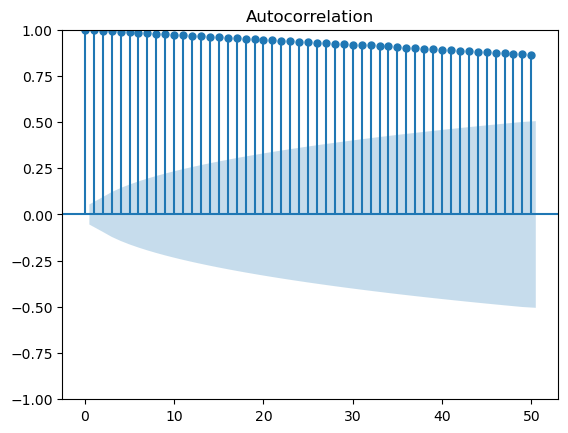

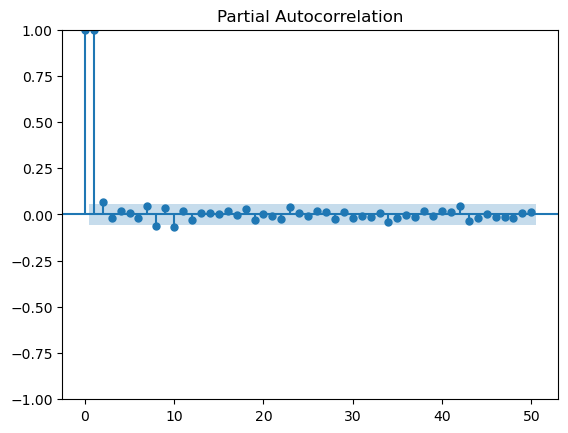

In [141]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

plot_acf(values_ts['Close'], lags=50)
plot_pacf(values_ts['Close'], lags=50)
plt.show()


In [143]:
values_ts['z_score'] = (values_ts['Close'] - values_ts['Close'].mean()) / values_ts['Close'].std()
anomalies = values_ts[abs(values_ts['z_score']) > 3]
anomalies

,DayOfWeek,Open,High,Low,Close,Adj Close,Volume,OC Difference,HL Difference,OC %Change,...,first_diff_avg_volume_10_day,first_diff_close_bracket,first_diff_short_ema,first_diff_long_ema,first_diff_close_lag_1,first_diff_close_lag_2,first_diff_close_lag_3,first_diff_close_lag_4,first_diff_close_lag_5,z_score
Date,,,,,,,,,,,,,,,,,,,,,


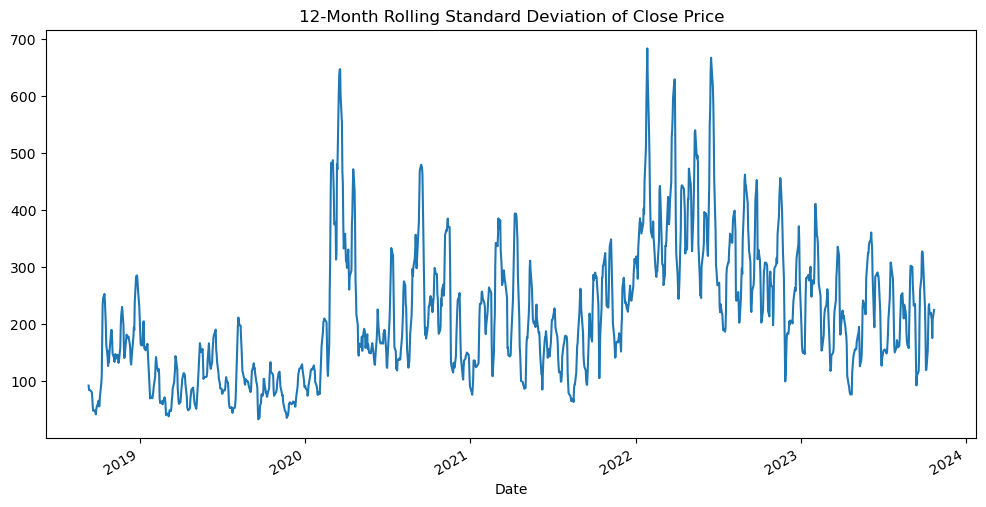

In [144]:
values_ts['Close'].rolling(window=12).std().plot(figsize=(12, 6))
plt.title('12-Month Rolling Standard Deviation of Close Price')
plt.show()


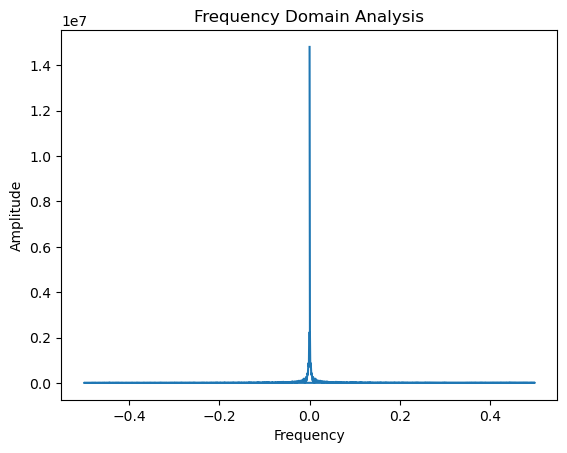

In [145]:
import numpy as np

fft_result = np.fft.fft(values_ts['Close'])
frequencies = np.fft.fftfreq(len(fft_result))
plt.plot(frequencies, np.abs(fft_result))
plt.title('Frequency Domain Analysis')
plt.xlabel('Frequency')
plt.ylabel('Amplitude')
plt.show()


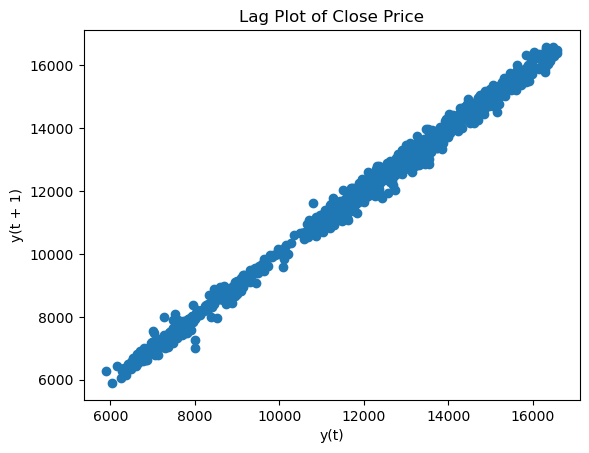

In [146]:
from pandas.plotting import lag_plot

lag_plot(values_ts['Close'])
plt.title('Lag Plot of Close Price')
plt.show()


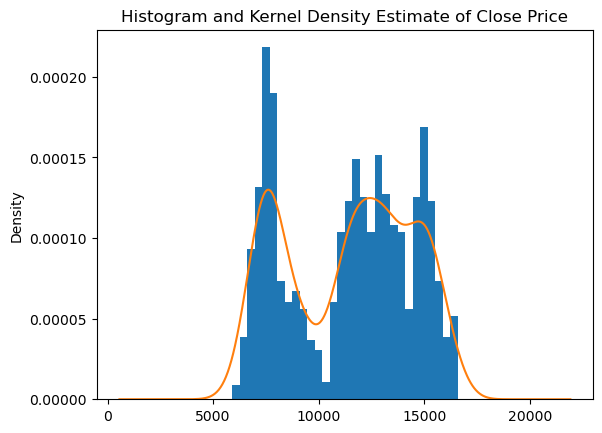

In [147]:
values_ts['Close'].plot(kind='hist', bins=30, density=True)
values_ts['Close'].plot(kind='kde')
plt.title('Histogram and Kernel Density Estimate of Close Price')
plt.show()


## Deep Dive: Relationship between Close and Volume

In [149]:
def crosscorr(datax, datay, lag=0, method='pearson'):
    """ Cross correlation at different lags """
    return datax.corr(datay.shift(lag), method=method)


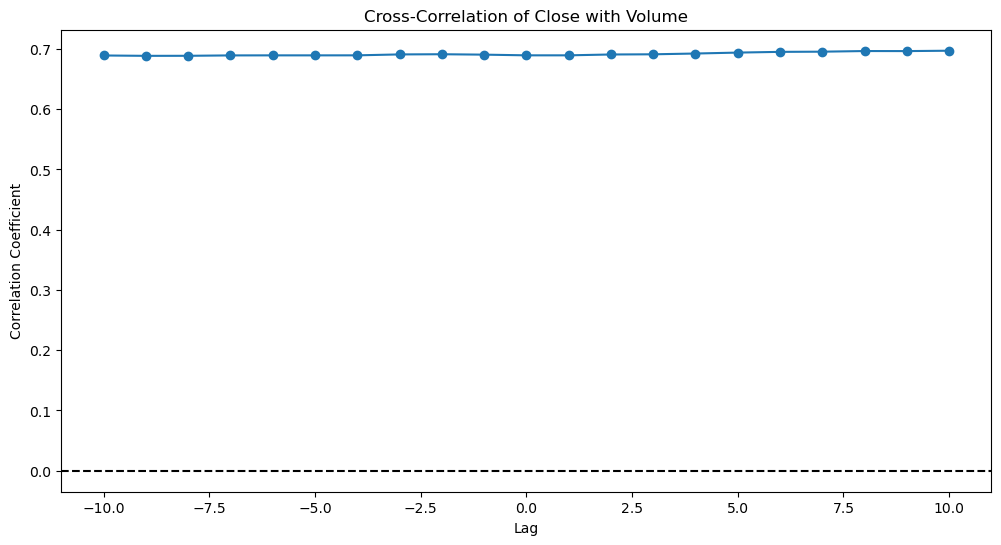

In [158]:
lags = range(-10, 11)  # for example, from -10 to +10 days
cross_corr_values = [crosscorr(values_ts['Close'], values_ts['Volume'], lag) for lag in lags]

plt.figure(figsize=(12, 6))
plt.plot(lags, cross_corr_values, marker='o')
plt.axhline(y=0, linestyle='--', color='k')
plt.title('Cross-Correlation of Close with Volume')
plt.xlabel('Lag')
plt.ylabel('Correlation Coefficient')
plt.show()


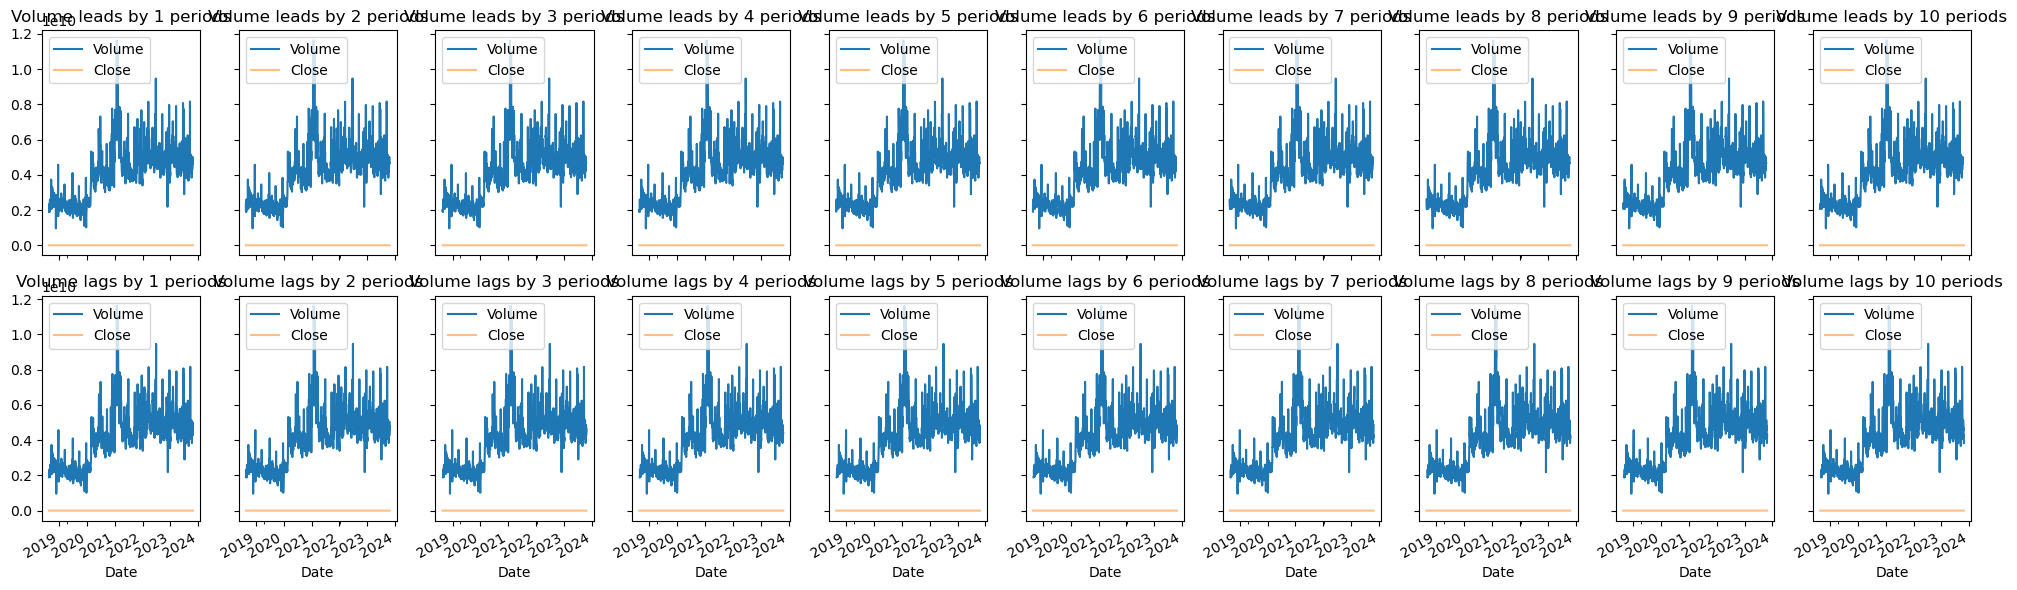

In [166]:
import matplotlib.pyplot as plt

# Assuming 'values_ts' is your DataFrame with 'Close' and 'Volume' columns
max_lag = 10
fig, axes = plt.subplots(2, max_lag, figsize=(20, 6), sharex=True, sharey=True)

# Check for volume leading close
for i in range(max_lag):
    lag = i + 1
    values_ts['Volume'].shift(-lag).plot(ax=axes[0, i], title=f'Volume leads by {lag} periods')
    values_ts['Close'].plot(ax=axes[0, i], alpha=0.5)
    axes[0, i].legend(["Volume", "Close"])

# Check for volume lagging close
for i in range(max_lag):
    lag = i + 1
    values_ts['Volume'].shift(lag).plot(ax=axes[1, i], title=f'Volume lags by {lag} periods')
    values_ts['Close'].plot(ax=axes[1, i], alpha=0.5)
    axes[1, i].legend(["Volume", "Close"])

plt.tight_layout()
plt.show()


In [167]:
from statsmodels.tsa.stattools import grangercausalitytests

granger_test_result = grangercausalitytests(values_ts[['Close', 'Volume']], maxlag=max_lag, verbose=True)



Granger Causality
number of lags (no zero) 1
ssr based F test:         F=1.0554  , p=0.3045  , df_denom=1296, df_num=1
ssr based chi2 test:   chi2=1.0578  , p=0.3037  , df=1
likelihood ratio test: chi2=1.0574  , p=0.3038  , df=1
parameter F test:         F=1.0554  , p=0.3045  , df_denom=1296, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=2.8825  , p=0.0564  , df_denom=1293, df_num=2
ssr based chi2 test:   chi2=5.7872  , p=0.0554  , df=2
likelihood ratio test: chi2=5.7744  , p=0.0557  , df=2
parameter F test:         F=2.8825  , p=0.0564  , df_denom=1293, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=1.9840  , p=0.1145  , df_denom=1290, df_num=3
ssr based chi2 test:   chi2=5.9842  , p=0.1124  , df=3
likelihood ratio test: chi2=5.9705  , p=0.1131  , df=3
parameter F test:         F=1.9840  , p=0.1145  , df_denom=1290, df_num=3

Granger Causality
number of lags (no zero) 4
ssr based F test:         F=1.7768  , p=0.

/Users/zubeirsaid/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/stattools.py:1488: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(


### NOTE: It appears that the 2 day lag volume is pretty significant to the current close price

In [168]:
import statsmodels.api as sm

# Use a lag of your choice based on previous insights
lag = 5
X = values_ts[['Volume']].shift(lag)
X = sm.add_constant(X)  # Adds a constant term to the predictor
y = values_ts['Close']

# Drop NaN values that were created by shifting
X.dropna(inplace=True)
y = y.loc[X.index]

model = sm.OLS(y, X).fit()
print(model.summary())


                            OLS Regression Results                            
Dep. Variable:                  Close   R-squared:                       0.481
Model:                            OLS   Adj. R-squared:                  0.481
Method:                 Least Squares   F-statistic:                     1200.
Date:                Mon, 13 Nov 2023   Prob (F-statistic):          1.35e-186
Time:                        14:42:18   Log-Likelihood:                -11766.
No. Observations:                1295   AIC:                         2.354e+04
Df Residuals:                    1293   BIC:                         2.355e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       5679.0878    175.669     32.328      0.0

## NEXT STEPS: Begin Modelling! (VAR)

## Data Prep

In [109]:
from statsmodels.tsa.stattools import adfuller

# Perform Augmented Dickey-Fuller test:
result = adfuller(values_ts['Close'])
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))

# Interpretation
if result[1] > 0.05:
    print("Series is not stationary")
else:
    print("Series is stationary")


ADF Statistic: -1.171878
p-value: 0.685575
Critical Values:
	1%: -3.435
	5%: -2.864
	10%: -2.568
Series is not stationary


In [110]:
def interpret_dftest(dftest):
    dfoutput = pd.Series(dftest[0:2], index=['Test Statistic','p-value'])
    return dfoutput

#### Close (Stationarity)

In [111]:
interpret_dftest(adfuller(values_ts['Close'].diff().dropna()))

Test Statistic   -1.143729e+01
p-value           6.302534e-21
dtype: float64

In [112]:
values_ts['first_diff_close'] = values_ts['Close'].diff()

#### Open (Stationarity)

In [113]:
interpret_dftest(adfuller(values_ts['Open'].diff().dropna()))

Test Statistic   -22.59903
p-value            0.00000
dtype: float64

In [114]:
values_ts['first_diff_open'] = values_ts['Open'].diff()

#### High (Stationarity)

In [115]:
interpret_dftest(adfuller(values_ts['High'].diff().dropna()))

Test Statistic   -25.016766
p-value            0.000000
dtype: float64

In [116]:
values_ts['first_diff_high'] = values_ts['High'].diff()

#### Low (Stationarity)

In [117]:
interpret_dftest(adfuller(values_ts['Low'].diff().dropna()))

Test Statistic   -21.370729
p-value            0.000000
dtype: float64

In [118]:
values_ts['first_diff_low'] = values_ts['Low'].diff()

#### Volume (Stationarity)

In [119]:
interpret_dftest(adfuller(values_ts['Volume'].diff().dropna()))

Test Statistic   -1.135024e+01
p-value           1.003671e-20
dtype: float64

In [120]:
values_ts['first_diff_volume'] = values_ts['Volume'].diff()

#### Avg Volume 10 Day (Statioanrity)

In [121]:
interpret_dftest(adfuller(values_ts['Avg_Volume_10_Day'].diff().dropna()))

Test Statistic   -7.343142e+00
p-value           1.052315e-10
dtype: float64

In [122]:
values_ts['first_diff_avg_volume_10_day'] = values_ts['Avg_Volume_10_Day'].diff()

#### Close Bracket (Stationarity)

In [123]:
interpret_dftest(adfuller(values_ts['Close_Bracket'].diff().dropna()))

Test Statistic   -1.154646e+01
p-value           3.531445e-21
dtype: float64

In [124]:
values_ts['first_diff_close_bracket'] = values_ts['Close_Bracket'].diff()

#### Short EMA (Stationarity)

In [125]:
interpret_dftest(adfuller(values_ts['ShortEMA'].diff().dropna()))

Test Statistic   -7.716392e+00
p-value           1.225049e-11
dtype: float64

In [126]:
values_ts['first_diff_short_ema'] = values_ts['ShortEMA'].diff()

#### Long EMA (Stationarity)

In [127]:
interpret_dftest(adfuller(values_ts['LongEMA'].diff().dropna()))

Test Statistic   -6.412541e+00
p-value           1.875332e-08
dtype: float64

In [128]:
values_ts['first_diff_long_ema'] = values_ts['LongEMA'].diff()

#### Close Lag 1 (Stationarity)

In [129]:
interpret_dftest(adfuller(values_ts['Close_Lag_1']))

Test Statistic   -1.154079
p-value           0.693031
dtype: float64

In [130]:
values_ts['first_diff_close_lag_1'] = values_ts['Close_Lag_1'].diff()

#### Close Lag 2 (Stationarity)

In [131]:
interpret_dftest(adfuller(values_ts['Close_Lag_2']))

Test Statistic   -1.226755
p-value           0.661982
dtype: float64

In [132]:
values_ts['first_diff_close_lag_2'] = values_ts['Close_Lag_2'].diff()

#### Close Lag 3 (Stationairty)

In [133]:
interpret_dftest(adfuller(values_ts['Close_Lag_3']))

Test Statistic   -1.263445
p-value           0.645726
dtype: float64

In [134]:
values_ts['first_diff_close_lag_3'] = values_ts['Close_Lag_3'].diff()

#### Close Lag 4 (Stationairty)

In [135]:
interpret_dftest(adfuller(values_ts['Close_Lag_4']))

Test Statistic   -1.264236
p-value           0.645372
dtype: float64

In [136]:
values_ts['first_diff_close_lag_4'] = values_ts['Close_Lag_4'].diff()

#### Close Lag 5 (Stationairty)

In [137]:
interpret_dftest(adfuller(values_ts['Close_Lag_5']))

Test Statistic   -1.228154
p-value           0.661369
dtype: float64

In [138]:
values_ts['first_diff_close_lag_5'] = values_ts['Close_Lag_5'].diff()